1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [3]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

Eigenvalues:
 [2.76107833e+01 1.81616854e-16 2.04232451e+00] 

Eigenvectors:
 [[-0.11700635 -0.81649658  0.56536965]
 [-0.57542723 -0.40824829 -0.70867259]
 [-0.80943994  0.40824829  0.42206672]] 

Eigenvalues svd:
 [2.54203185e-01 1.39082675e-03 1.76327551e-34] 

Eigenvectors svd:
 [[-0.11700635 -0.57542723 -0.80943994]
 [ 0.56536965 -0.70867259  0.42206672]
 [-0.81649658 -0.40824829  0.40824829]] 

variability of  27.610783252153798 = 93.11261224538016 %

variability of  2.042324513087451 = 6.887387754619842 %

variability of  7.271907079938754e-16 = 2.452325448485616e-15 %

 yes, it makes sense because the first one constraints the second and the third ones. 
 The third is generated by linear combination of the first two so we can delete it


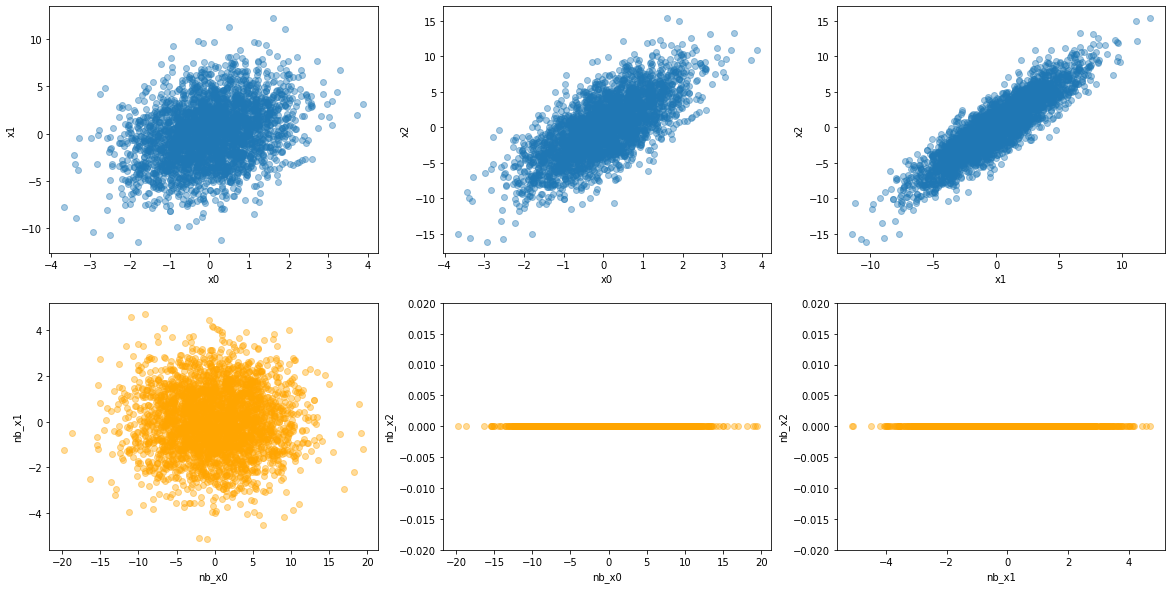

In [4]:
N = 3000
np.random.seed(3827)

x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2

dataset = np.zeros((3,N))
dataset[0] = x1
dataset[1] = x2
dataset[2] = x3

cov_matrix = np.cov(dataset)

#Eigendecomposition
l, V = la.eig(cov_matrix)
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

#SVD
U, S, Vt = la.svd(cov_matrix)
l_svd = S**2/(N-1)

print("Eigenvalues svd:\n", l_svd, '\n')
print("Eigenvectors svd:\n", Vt, '\n')

eig1 = S[0]/cov_matrix.trace() *100 
eig2 = S[1]/cov_matrix.trace() *100 
eig3 = S[2]/cov_matrix.trace() *100 

print("variability of ", S[0], "=", eig1, "%\n")
print("variability of ", S[1], "=", eig2, "%\n")
print("variability of ", S[2], "=", eig3, "%")
print("\n yes, it makes sense because the first one constraints the second and the third ones. \n The third is generated by linear combination of the first two so we can delete it")

new_dataset = dataset[:2,:]
Xp = np.dot(U.T, dataset)

fig, graph = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
graph[0,0].scatter(dataset[0],dataset[1],alpha = 0.4 )
graph[0,1].scatter(dataset[0],dataset[2],alpha = 0.4 )
graph[0,2].scatter(dataset[1],dataset[2],alpha = 0.4)
graph[1,0].scatter(Xp[0],Xp[1],alpha = 0.4, color = "orange")
graph[1,1].scatter(Xp[0],Xp[2],alpha = 0.4, color = "orange")
graph[1,2].scatter(Xp[1],Xp[2],alpha = 0.4, color = "orange")
graph[0][0].set(xlabel="x0",ylabel="x1")
graph[0][1].set(xlabel="x0",ylabel="x2")
graph[0][2].set(xlabel="x1",ylabel="x2")
graph[1][0].set(xlabel="nb_x0",ylabel="nb_x1")
graph[1][1].set(xlabel="nb_x0",ylabel="nb_x2")
graph[1][1].set_ylim([-0.02, 0.02])
graph[1][2].set(xlabel="nb_x1",ylabel="nb_x2")
graph[1][2].set_ylim([-0.02, 0.02])
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

variability of  27.61084315903508 = 92.71256758979561 %

variability of  2.0423420471977654 = 6.857841102557682 %

variability of  0.03460023888985143 = 0.1161817829401821 %

variability of  0.03186060822154271 = 0.10698256392163745 %

variability of  0.02583914291103547 = 0.08676349613097017 %

variability of  0.014536490569252216 = 0.04881109050736143 %

variability of  0.014093654111128314 = 0.047324120159568814 %

variability of  0.0035394751246265663 = 0.011884962180771333 %

variability of  0.0015858245665988603 = 0.005324932182241018 %

variability of  0.0014749414608392598 = 0.004952605362009909 %

variability of  0.00040673694733010373 = 0.001365754261954499 %

variability of  7.723258781924474e-17 = 2.5933404051022067e-16 %

variability of  6.556612746752942e-19 = 2.201600287764234e-18 %



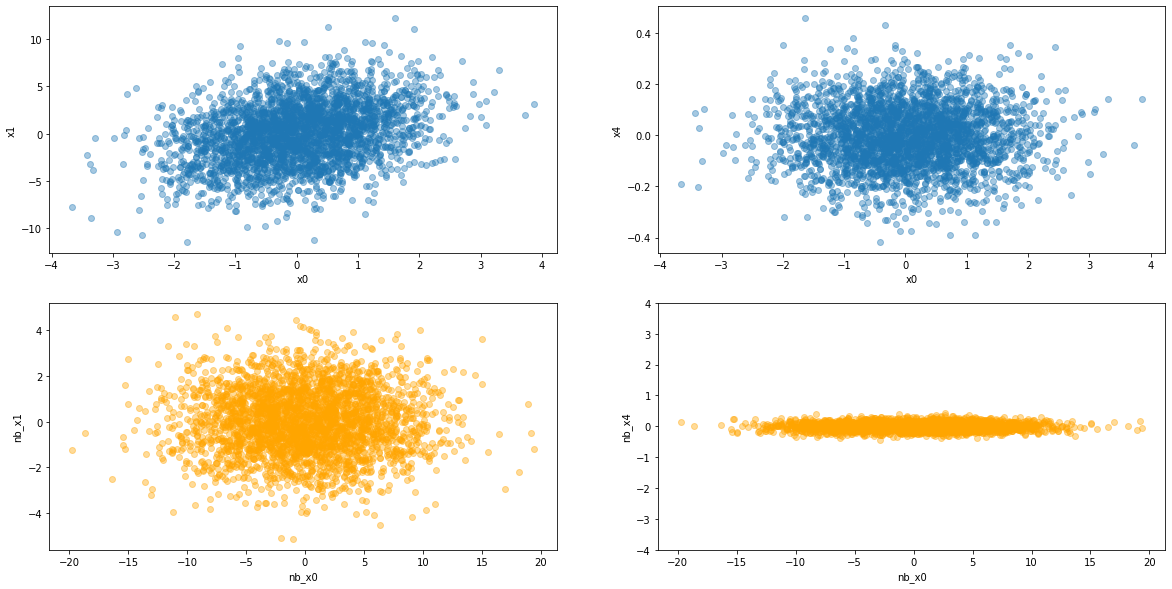

In [5]:
set = np.zeros((13, N))

std = np.random.randint(0,10, size = 10)

for i in range(13):
    if i <= 2 :
        set[i] = dataset[i]
    else :
        #std = np.random.randint(0,9, size = 10)
        set[i] = np.random.normal(0, scale = 1/50*std[i-3], size = N) #change scale in random numbers

cov_matrix = np.cov(set)
U, S, Vt = la.svd(cov_matrix)
l_svd = S**2/(N-1)

eig1 = S[0]/cov_matrix.trace() *100 
eig2 = S[1]/cov_matrix.trace() *100 
eig3 = S[2]/cov_matrix.trace() *100 

for i in range(13):
    print("variability of ", S[i], "=",  S[i]/cov_matrix.trace() *100 , "%\n")

new_set = set[:2,:]
Xp1 = np.dot(U.T, set)

fig, graph = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
graph[0,0].scatter(set[0],set[1],alpha = 0.4 )
graph[0,1].scatter(set[0],set[5],alpha = 0.4 )
graph[1,0].scatter(Xp1[0],Xp1[1],alpha = 0.4, color = "orange")
graph[1,1].scatter(Xp1[0],Xp1[5],alpha = 0.4, color = "orange")
graph[0][0].set(xlabel="x0",ylabel="x1")
graph[0][1].set(xlabel="x0",ylabel="x4")

graph[1][0].set(xlabel="nb_x0",ylabel="nb_x1")
graph[1][1].set(xlabel="nb_x0",ylabel="nb_x4")
graph[1][1].set_ylim([-4, 4]) # even this time the PCA was able to eliminate the noises 

plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [1]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-12-26 18:15:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data/magic04.data.2’

magic04.data.2          [       <=>          ]   1.41M  1.12MB/s    in 1.3s    

2023-12-26 18:15:34 (1.12 MB/s) - ‘data/magic04.data.2’ saved [1477391]

--2023-12-26 18:15:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data/magic04.names.3’

magic04.names.3         [ <=>                ]   5.27K  --.-KB/s    in 0s      

2023-12-26 18:15:35 (50.5 MB/s) - ‘da

In [6]:
data = pd.read_csv("data/magic04.data")
data.columns = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','category']


In [8]:
data = data.iloc[:,:-1]
N = data.index.stop
print(N)
U,S,Vt = la.svd(data)
l_svd = S**2/(N-1)

for li,ui in zip(l_svd, U.T):
    print(li, ui)

print(l_svd)
covm = np.cov(data)  
tr = covm.trace()

for eig in l_svd:
    print("The eigenvalue", eig, "influences the data for the", S[eig]*100/tr, "%")


19019


KeyboardInterrupt: 

In [ ]:
print("It's not possible to eliminate one parameter since every one of them contributes significantly")

print("\n \n N.B. The values don't appear in this notebook because from the second time I ran this it took forever and the kernel stopped")